In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as ols
import io
from sklearn.model_selection import train_test_split

In [ ]:
!python --version

Python 3.7.10


In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
!pip list -v | grep [Kk]eras

Keras                         2.4.3          /usr/local/lib/python3.7/dist-packages pip      
Keras-Preprocessing           1.1.2          /usr/local/lib/python3.7/dist-packages pip      
keras-vis                     0.4.1          /usr/local/lib/python3.7/dist-packages pip      


In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_total = "/content/gdrive/MyDrive/Block_leadtime_machine_learning/Block assembly /" 
raw_data = pd.read_csv(path_total + "2.csv")
raw_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,"□ 조립 리드타임 실적 집계 (HN5010 이후, 16년 5월 이후)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,기본정보,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타 정보,NaN,NaN,NaN,계획,실적,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T,NaN,NaN,NaN,NaN
4,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,NaN,HN5010


In [ ]:
raw_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,"□ 조립 리드타임 실적 집계 (HN5010 이후, 16년 5월 이후)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,기본정보,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,기타 정보,NaN,NaN,NaN,계획,실적,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T,NaN,NaN,NaN,NaN
4,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,NaN,HN5010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,NaN,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,2019/4/10,2019/4/25,12,NaN,NaN,NaN,NaN
6953,NaN,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,2019/4/11,2019/4/25,11,NaN,NaN,NaN,NaN
6954,NaN,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,2019/4/10,2019/4/22,9,NaN,NaN,NaN,NaN
6955,NaN,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,2019/4/11,2019/4/23,9,NaN,NaN,NaN,NaN


In [ ]:
raw_data.drop(index=[0,1,2],inplace=True)

In [ ]:
raw_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
3,NaN,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T,NaN,NaN,NaN,NaN
4,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,NaN,HN5010
5,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1M,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,NaN,HN5013
6,NaN,조립1팀,중조립,115K PC,HN5010,A22C,ET1A,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,2016/6/4,2016/6/17,9,NaN,NaN,NaN,HN5014
7,NaN,조립1팀,중조립,115K PC,HN5010,A22C,SS4A,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,2016/6/15,2016/6/28,10,NaN,NaN,NaN,HN5015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,NaN,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,2019/4/10,2019/4/25,12,NaN,NaN,NaN,NaN
6953,NaN,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,2019/4/11,2019/4/25,11,NaN,NaN,NaN,NaN
6954,NaN,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,2019/4/10,2019/4/22,9,NaN,NaN,NaN,NaN
6955,NaN,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,2019/4/11,2019/4/23,9,NaN,NaN,NaN,NaN


In [ ]:
raw_data.drop("Unnamed: 18",axis=1,inplace=True)

In [ ]:
raw_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 19,Unnamed: 20,Unnamed: 21
3,NaN,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T,NaN,NaN,NaN
4,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,HN5010
5,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1M,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5,NaN,NaN,HN5013
6,NaN,조립1팀,중조립,115K PC,HN5010,A22C,ET1A,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,2016/6/4,2016/6/17,9,NaN,NaN,HN5014
7,NaN,조립1팀,중조립,115K PC,HN5010,A22C,SS4A,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,2016/6/15,2016/6/28,10,NaN,NaN,HN5015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,NaN,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,2019/4/10,2019/4/25,12,NaN,NaN,NaN
6953,NaN,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,2019/4/11,2019/4/25,11,NaN,NaN,NaN
6954,NaN,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,2019/4/10,2019/4/22,9,NaN,NaN,NaN
6955,NaN,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,2019/4/11,2019/4/23,9,NaN,NaN,NaN


In [ ]:
raw_data.drop(["Unnamed: 19","Unnamed: 20","Unnamed: 21"],axis=1,inplace=True)

In [ ]:
raw_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,NaN,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T
4,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5
5,NaN,조립1팀,중조립,115K PC,HN5010,A22C,LB1M,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5
6,NaN,조립1팀,중조립,115K PC,HN5010,A22C,ET1A,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,2016/6/4,2016/6/17,9
7,NaN,조립1팀,중조립,115K PC,HN5010,A22C,SS4A,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,2016/6/15,2016/6/28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,NaN,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,2019/4/10,2019/4/25,12
6953,NaN,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,2019/4/11,2019/4/25,11
6954,NaN,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,2019/4/10,2019/4/22,9
6955,NaN,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,2019/4/11,2019/4/23,9


In [ ]:
raw_data.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
raw_data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
3,팀,세부공정,선종,프로젝트,블럭,Ass'y,PCG,PCG명,업체명,Weight,길이(L),폭(B),높이(H),계획L/T,착수,완료,실적L/T
4,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5
5,조립1팀,중조립,115K PC,HN5010,A22C,LB1M,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,2016/5/28,2016/6/3,5
6,조립1팀,중조립,115K PC,HN5010,A22C,ET1A,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,2016/6/4,2016/6/17,9
7,조립1팀,중조립,115K PC,HN5010,A22C,SS4A,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,2016/6/15,2016/6/28,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,2019/4/10,2019/4/25,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,2019/4/11,2019/4/25,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,2019/4/10,2019/4/22,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,2019/4/11,2019/4/23,9


In [ ]:
raw_data.rename(columns={"Unnamed: 1": "team", "Unnamed: 2": "D_p", "Unnamed: 3": "S_t", "Unnamed: 4": "P_j", "Unnamed: 5": "B_l",  "Unnamed: 6": "Ass'y", "Unnamed: 7": "PCG", "Unnamed: 8": "PCG_n", "Unnamed: 9": "Com_n", "Unnamed: 10": "Weight", "Unnamed: 11": "L",
                       "Unnamed: 12": "B", "Unnamed: 13": "H", "Unnamed: 14": "PL_LT", "Unnamed: 17": "LT" },inplace=True)

In [ ]:
raw_data.drop(["Unnamed: 15","Unnamed: 16"],axis=1,inplace=True)

In [ ]:
raw_data.drop(index=[3],inplace=True)

In [ ]:
raw_data

,team,D_p,S_t,P_j,B_l,Ass'y,PCG,PCG_n,Com_n,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,LB1A,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,LB1M,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,ET1A,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,SS4A,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,SS4M,AL3,RUDDER HORN,(유)예솔기업,NaN,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,NaN,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,9


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 4 to 6956
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    6953 non-null   object
 1   D_p     6953 non-null   object
 2   S_t     6953 non-null   object
 3   P_j     6953 non-null   object
 4   B_l     6953 non-null   object
 5   Ass'y   4223 non-null   object
 6   PCG     6953 non-null   object
 7   PCG_n   6953 non-null   object
 8   Com_n   6953 non-null   object
 9   Weight  2730 non-null   object
 10  L       6953 non-null   object
 11  B       6953 non-null   object
 12  H       6921 non-null   object
 13  PL_LT   6332 non-null   object
 14  LT      6953 non-null   object
dtypes: object(15)
memory usage: 869.1+ KB


In [ ]:
# raw_data.drop(["Weight"],axis=1,inplace=True)

In [ ]:
raw_data.drop(["Ass'y"],axis=1,inplace=True)

In [ ]:
raw_data

,team,D_p,S_t,P_j,B_l,PCG,PCG_n,Com_n,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,9


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 4 to 6956
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    6953 non-null   object
 1   D_p     6953 non-null   object
 2   S_t     6953 non-null   object
 3   P_j     6953 non-null   object
 4   B_l     6953 non-null   object
 5   PCG     6953 non-null   object
 6   PCG_n   6953 non-null   object
 7   Com_n   6953 non-null   object
 8   Weight  2730 non-null   object
 9   L       6953 non-null   object
 10  B       6953 non-null   object
 11  H       6921 non-null   object
 12  PL_LT   6332 non-null   object
 13  LT      6953 non-null   object
dtypes: object(14)
memory usage: 814.8+ KB


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
raw_data["LT"] =raw_data["LT"].astype(int)

In [ ]:
# raw_data.dropna(axis=0,how='any',inplace=True) #drop all rows that have any NaN values

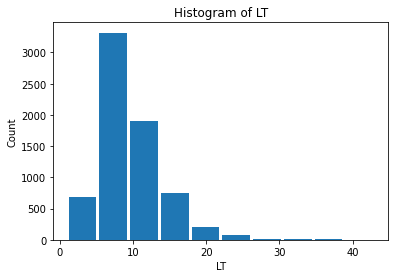

In [ ]:
# Histogram(분포 확인)
plt.hist(raw_data["LT"], histtype='bar', rwidth=0.9)
plt.xlabel('LT')
plt.ylabel('Count')
plt.title('Histogram of LT')
plt.show()

In [ ]:
raw_data

,team,D_p,S_t,P_j,B_l,PCG,PCG_n,Com_n,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,NaN,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,9


In [ ]:
median = raw_data["Weight"].median()
print(median)
# sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
# sample_incomplete_rows

115.55


In [ ]:
raw_data["Weight"].fillna(median, inplace=True) # option 3
raw_data

,team,D_p,S_t,P_j,B_l,PCG,PCG_n,Com_n,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,NaN,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,NaN,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,NaN,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,NaN,9


In [ ]:
median = raw_data["PL_LT"].median()
print(median)

8.0


In [ ]:
raw_data["PL_LT"].fillna(median, inplace=True) # option 3
raw_data

,team,D_p,S_t,P_j,B_l,PCG,PCG_n,Com_n,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.2,16.0,13.0,5.0,8,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.9,16.0,14.0,5.0,8,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.0,8.0,4.0,5.0,8,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.1,8.0,4.0,5.0,8,9


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 4 to 6956
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    6953 non-null   object
 1   D_p     6953 non-null   object
 2   S_t     6953 non-null   object
 3   P_j     6953 non-null   object
 4   B_l     6953 non-null   object
 5   PCG     6953 non-null   object
 6   PCG_n   6953 non-null   object
 7   Com_n   6953 non-null   object
 8   Weight  6953 non-null   object
 9   L       6953 non-null   object
 10  B       6953 non-null   object
 11  H       6921 non-null   object
 12  PL_LT   6953 non-null   object
 13  LT      6953 non-null   int64 
dtypes: int64(1), object(13)
memory usage: 814.8+ KB


In [ ]:
median = raw_data["H"].median()
print(median)
raw_data["H"].fillna(median, inplace=True) # option 3
print(raw_data)

4.0
      team  D_p       S_t     P_j   B_l  ...      L      B     H PL_LT  LT
4     조립1팀  중조립   115K PC  HN5010  A22C  ...   1.6    4.8   5.9     8    5
5     조립1팀  중조립   115K PC  HN5010  A22C  ...   1.6    4.8   5.9     8    5
6     조립1팀  중조립   115K PC  HN5010  A22C  ...   4.8    8.4   6.6    11    9
7     조립1팀  중조립   115K PC  HN5010  A22C  ...   9.3    9.9   5.3    15   10
8     조립1팀  중조립   115K PC  HN5010  A22C  ...   8.3    9.9   5.3    15    9
...    ...  ...       ...     ...   ...  ...    ...    ...   ...   ...  ..
6952  조립1팀  대조립  115K COT  HN5041  E22P  ...  16.0   13.0   5.0      8  12
6953  조립1팀  대조립  115K COT  HN5041  E22S  ...  16.0   14.0   5.0      8  11
6954  조립1팀  대조립  115K COT  HN5041  E23P  ...   8.0    4.0   5.0      8   9
6955  조립1팀  대조립  115K COT  HN5041  E23S  ...   8.0    4.0   5.0      8   9
6956  조립1팀  대조립  115K COT  HN5041  E31S  ...  18.0   22.0   5.0      8   9

[6953 rows x 14 columns]


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 4 to 6956
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   team    6953 non-null   object
 1   D_p     6953 non-null   object
 2   S_t     6953 non-null   object
 3   P_j     6953 non-null   object
 4   B_l     6953 non-null   object
 5   PCG     6953 non-null   object
 6   PCG_n   6953 non-null   object
 7   Com_n   6953 non-null   object
 8   Weight  6953 non-null   object
 9   L       6953 non-null   object
 10  B       6953 non-null   object
 11  H       6953 non-null   object
 12  PL_LT   6953 non-null   object
 13  LT      6953 non-null   object
dtypes: object(14)
memory usage: 814.8+ KB


In [ ]:
raw_data["L"] =raw_data["L"].astype(float)
raw_data["B"] =raw_data["B"].astype(float)
raw_data["H"] =raw_data["H"].astype(float)
raw_data["Weight"] = raw_data["Weight"].astype(float)
raw_data["PL_LT"] =raw_data["PL_LT"].astype(int)

In [ ]:
raw_data.corr()

,Weight,L,B,H,PL_LT,LT
Weight,1.000000,0.250220,0.290556,0.170991,0.021267,0.036773
L,0.250220,1.000000,0.559059,0.501328,0.125955,0.123164
B,0.290556,0.559059,1.000000,0.523345,0.161837,0.119204
H,0.170991,0.501328,0.523345,1.000000,0.246881,0.182703
PL_LT,0.021267,0.125955,0.161837,0.246881,1.000000,0.701095
LT,0.036773,0.123164,0.119204,0.182703,0.701095,1.000000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 4 to 6956
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   team    6953 non-null   object 
 1   D_p     6953 non-null   object 
 2   S_t     6953 non-null   object 
 3   P_j     6953 non-null   object 
 4   B_l     6953 non-null   object 
 5   PCG     6953 non-null   object 
 6   PCG_n   6953 non-null   object 
 7   Com_n   6953 non-null   object 
 8   Weight  6953 non-null   float64
 9   L       6953 non-null   float64
 10  B       6953 non-null   float64
 11  H       6953 non-null   float64
 12  PL_LT   6953 non-null   int64  
 13  LT      6953 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 814.8+ KB


In [ ]:
raw_data["team"] =raw_data["team"].astype(str)
raw_data["D_p"] =raw_data["D_p"].astype(str)
raw_data["S_t"] =raw_data["S_t"].astype(str)
raw_data["P_j"] =raw_data["P_j"].astype(str)
raw_data["B_l"] =raw_data["B_l"].astype(str)
# raw_data["Ass'y"] =raw_data["Ass'y"].astype(str)
raw_data["PCG"] =raw_data["PCG"].astype(str)
raw_data["PCG_n"] =raw_data["PCG_n"].astype(str)
raw_data["Com_n"] =raw_data["Com_n"].astype(str)

In [ ]:
raw_data.rename(columns={"D_p": "DP","S_t": "St", "B_l": "BL", "Com_n": "Comn"},inplace=True)

In [ ]:
raw_data

,team,DP,St,P_j,BL,PCG,PCG_n,Comn,Weight,L,B,H,PL_LT,LT
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
5,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
6,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,4.8,8.4,6.6,11,9
7,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,9.3,9.9,5.3,15,10
8,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6952,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.20,16.0,13.0,5.0,8,12
6953,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.90,16.0,14.0,5.0,8,11
6954,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.00,8.0,4.0,5.0,8,9
6955,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.10,8.0,4.0,5.0,8,9


In [ ]:
raw_data = raw_data.reset_index()

In [ ]:
raw_data.drop(["index"],axis=1,inplace=True)

In [ ]:
raw_data['LT']

0        5
1        5
2        9
3       10
4        9
        ..
6948    12
6949    11
6950     9
6951     9
6952     9
Name: LT, Length: 6953, dtype: int64

In [ ]:
raw_data

,team,DP,St,P_j,BL,PCG,PCG_n,Comn,Weight,L,B,H,PL_LT,LT
0,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
1,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,1.6,4.8,5.9,8,5
2,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,4.8,8.4,6.6,11,9
3,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,9.3,9.9,5.3,15,10
4,조립1팀,중조립,115K PC,HN5010,A22C,AL3,RUDDER HORN,(유)예솔기업,115.55,8.3,9.9,5.3,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,조립1팀,대조립,115K COT,HN5041,E22P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,29.20,16.0,13.0,5.0,8,12
6949,조립1팀,대조립,115K COT,HN5041,E22S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,31.90,16.0,14.0,5.0,8,11
6950,조립1팀,대조립,115K COT,HN5041,E23P,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.00,8.0,4.0,5.0,8,9
6951,조립1팀,대조립,115K COT,HN5041,E23S,EL1,E/ROOM (L-TYPE),(유)엠제이산업,11.10,8.0,4.0,5.0,8,9


In [ ]:
BL_LT = raw_data.drop("LT",axis=1)
BL_LT_labels = raw_data["LT"].copy()

In [ ]:
list_1=[]
for i in range(len(BL_LT.columns)):
    if not np.issubdtype((BL_LT[(BL_LT.columns[i])]).dtypes, np.int64) and not np.issubdtype((BL_LT[(BL_LT.columns[i])]).dtypes, np.float64) :
        list_1.append(BL_LT.columns[i])
print(list_1)

['team', 'DP', 'St', 'P_j', 'BL', 'PCG', 'PCG_n', 'Comn']


In [ ]:
BL_LT_num = BL_LT.drop(list_1,axis=1)

In [ ]:
BL_LT_num

,Weight,L,B,H,PL_LT
0,115.55,1.6,4.8,5.9,8
1,115.55,1.6,4.8,5.9,8
2,115.55,4.8,8.4,6.6,11
3,115.55,9.3,9.9,5.3,15
4,115.55,8.3,9.9,5.3,15
...,...,...,...,...,...
6948,29.20,16.0,13.0,5.0,8
6949,31.90,16.0,14.0,5.0,8
6950,11.00,8.0,4.0,5.0,8
6951,11.10,8.0,4.0,5.0,8


In [ ]:
list(BL_LT_num)

['Weight', 'L', 'B', 'H', 'PL_LT']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(BL_LT_num)             #수치형 데이터        
cat_attribs = list_1                     #범주형 데이터          

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])

BL_LT_prepared = full_pipeline.fit_transform(BL_LT)

In [ ]:
BL_LT_prepared

array([[-0.10757432, -1.70018795, -0.97922809, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10757432, -1.70018795, -0.97922809, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10757432, -1.26757001, -0.42667264, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-2.56608798, -0.83495208, -1.10201819, ...,  0.        ,
         0.        ,  0.        ],
       [-2.56373646, -0.83495208, -1.10201819, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06761388,  0.51697898,  1.66075907, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca=KernelPCA(n_components=60,kernel='rbf',random_state=42)
X_p=rbf_pca.fit_transform(BL_LT_prepared)

In [ ]:
X_p

array([[-0.11653014,  0.06048915,  0.02276733, ..., -0.00764218,
         0.00427249,  0.00478791],
       [-0.11653014,  0.06048915,  0.02276733, ..., -0.00764218,
         0.00427249,  0.00478791],
       [-0.04433659,  0.10869678,  0.03207795, ..., -0.0091795 ,
         0.00412487,  0.00343809],
       ...,
       [-0.11254216,  0.14881597, -0.16418569, ..., -0.03565628,
         0.01729243,  0.00828502],
       [-0.1125022 ,  0.14875043, -0.16404517, ..., -0.0356321 ,
         0.01729536,  0.00827923],
       [ 0.1246326 ,  0.04388048, -0.03319675, ...,  0.02714476,
         0.01971395,  0.00199748]])

In [ ]:
X_p

array([[-0.11653014,  0.06048915,  0.02276733, ..., -0.00764218,
         0.00427249,  0.00478791],
       [-0.11653014,  0.06048915,  0.02276733, ..., -0.00764218,
         0.00427249,  0.00478791],
       [-0.04433659,  0.10869678,  0.03207795, ..., -0.0091795 ,
         0.00412487,  0.00343809],
       ...,
       [-0.11254216,  0.14881597, -0.16418569, ..., -0.03565628,
         0.01729243,  0.00828502],
       [-0.1125022 ,  0.14875043, -0.16404517, ..., -0.0356321 ,
         0.01729536,  0.00827923],
       [ 0.1246326 ,  0.04388048, -0.03319675, ...,  0.02714476,
         0.01971395,  0.00199748]])

In [ ]:
df = pd.DataFrame(X_p)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-0.116530,0.060489,0.022767,-0.041275,0.145822,-0.039330,-0.050912,0.036469,0.047139,-0.009587,0.045450,0.000971,-0.004406,-0.024183,0.021581,0.025315,0.056350,0.052774,0.053426,0.016844,-0.008581,0.012848,-0.014757,0.080298,-0.004525,-0.082259,0.009474,-0.020162,-0.000860,0.033300,-0.030803,0.010490,0.021660,0.011090,-0.001925,0.002198,-0.020317,0.001921,-0.002199,-0.002306,0.000587,-0.001292,0.025989,0.013399,0.029997,0.005034,-0.000505,0.004662,-0.033566,0.010574,0.005550,0.005913,0.016168,0.014009,-0.015392,-0.005894,-0.017491,-0.007642,0.004272,0.004788
1,-0.116530,0.060489,0.022767,-0.041275,0.145822,-0.039330,-0.050912,0.036469,0.047139,-0.009587,0.045450,0.000971,-0.004406,-0.024183,0.021581,0.025315,0.056350,0.052774,0.053426,0.016844,-0.008581,0.012848,-0.014757,0.080298,-0.004525,-0.082259,0.009474,-0.020162,-0.000860,0.033300,-0.030803,0.010490,0.021660,0.011090,-0.001925,0.002198,-0.020317,0.001921,-0.002199,-0.002306,0.000587,-0.001292,0.025989,0.013399,0.029997,0.005034,-0.000505,0.004662,-0.033566,0.010574,0.005550,0.005913,0.016168,0.014009,-0.015392,-0.005894,-0.017491,-0.007642,0.004272,0.004788
2,-0.044337,0.108697,0.032078,-0.017008,0.120248,-0.034474,-0.049272,0.017355,0.067131,0.001743,0.045272,0.004022,-0.007439,-0.015113,0.025642,0.037530,0.067367,0.058863,0.051782,0.017481,-0.007775,0.011060,-0.012733,0.079553,-0.006520,-0.080352,0.007449,-0.026789,-0.000088,0.041699,-0.024750,0.006235,0.018399,0.006548,-0.001424,0.002375,-0.018589,0.003469,-0.001667,-0.002300,0.000657,-0.000540,0.025190,0.012852,0.032978,0.007479,0.003197,0.005507,-0.029227,0.000986,0.009259,0.003223,0.015383,0.012681,-0.013249,-0.007871,-0.014825,-0.009180,0.004125,0.003438
3,-0.008026,0.163301,0.065345,0.034822,0.039071,-0.018799,-0.047048,-0.004620,0.069567,0.010716,0.027839,0.010737,-0.002470,-0.007635,0.028240,0.040521,0.074220,0.064725,0.051232,0.014421,-0.008718,0.007773,-0.004732,0.080957,-0.008097,-0.078578,0.009543,-0.030497,0.006686,0.049134,-0.020158,0.009528,0.016533,0.000870,-0.000746,0.002075,-0.014825,0.006450,-0.001003,-0.002823,-0.001118,0.000561,0.023573,0.011548,0.038682,0.011108,0.007755,0.005734,-0.024586,-0.007219,0.014767,0.001125,0.014891,0.013749,-0.010335,-0.009001,-0.012741,-0.010727,0.002746,0.001744
4,-0.013805,0.165488,0.067773,0.029715,0.044104,-0.014351,-0.046805,-0.005843,0.070192,0.011296,0.029392,0.010988,-0.003463,-0.006148,0.029246,0.040682,0.075720,0.063880,0.050952,0.015316,-0.008835,0.008128,-0.005134,0.081485,-0.008374,-0.078554,0.008869,-0.030908,0.006206,0.048613,-0.020236,0.008644,0.016391,0.000688,-0.000746,0.002182,-0.015028,0.006375,-0.000981,-0.002814,-0.000941,0.000477,0.023590,0.011603,0.038310,0.010989,0.007708,0.005583,-0.024233,-0.007896,0.014743,0.000437,0.014614,0.014013,-0.010680,-0.009076,-0.012435,-0.010419,0.002442,0.001859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,0.001532,0.119919,-0.170937,-0.055093,0.004505,-0.080084,0.045345,-0.015114,-0.093716,0.046969,-0.016750,-0.000131,-0.021054,0.005988,-0.023028,-0.008094,-0.016665,-0.020677,-0.026374,-0.014947,-0.001614,0.026504,0.018007,0.031836,0.004723,0.009261,-0.008117,0.023637,-0.025487,-0.013291,-0.005503,-0.015786,-0.005137,0.003568,0.001806,0.000696,-0.009946,-0.005924,-0.004261,0.002303,0.005686,-0.000129,0.002800,0.002934,-0.009021,-0.007341,-0.011867,0.006570,-0.025150,0.007444,-0.032964,-0.006312,0.015722,-0.007491,-0.003042,0.020106,0.008963,-0.033265,0.018586,0.007294
6949,0.009608,0.118016,-0.167968,-0.063028,0.001033,-0.078983,0.045374,-0.018933,-0.090697,0.048604,-0.015474,-0.001346,-0.021315,0.006463,-0.022426,-0.006437,-0.015869,-0.02212

In [ ]:
df.insert(df.shape[1], 'Lt', BL_LT_labels)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Lt
0,-0.116530,0.060489,0.022767,-0.041275,0.145822,-0.039330,-0.050912,0.036469,0.047139,-0.009587,0.045450,0.000971,-0.004406,-0.024183,0.021581,0.025315,0.056350,0.052774,0.053426,0.016844,-0.008581,0.012848,-0.014757,0.080298,-0.004525,-0.082259,0.009474,-0.020162,-0.000860,0.033300,-0.030803,0.010490,0.021660,0.011090,-0.001925,0.002198,-0.020317,0.001921,-0.002199,-0.002306,0.000587,-0.001292,0.025989,0.013399,0.029997,0.005034,-0.000505,0.004662,-0.033566,0.010574,0.005550,0.005913,0.016168,0.014009,-0.015392,-0.005894,-0.017491,-0.007642,0.004272,0.004788,5
1,-0.116530,0.060489,0.022767,-0.041275,0.145822,-0.039330,-0.050912,0.036469,0.047139,-0.009587,0.045450,0.000971,-0.004406,-0.024183,0.021581,0.025315,0.056350,0.052774,0.053426,0.016844,-0.008581,0.012848,-0.014757,0.080298,-0.004525,-0.082259,0.009474,-0.020162,-0.000860,0.033300,-0.030803,0.010490,0.021660,0.011090,-0.001925,0.002198,-0.020317,0.001921,-0.002199,-0.002306,0.000587,-0.001292,0.025989,0.013399,0.029997,0.005034,-0.000505,0.004662,-0.033566,0.010574,0.005550,0.005913,0.016168,0.014009,-0.015392,-0.005894,-0.017491,-0.007642,0.004272,0.004788,5
2,-0.044337,0.108697,0.032078,-0.017008,0.120248,-0.034474,-0.049272,0.017355,0.067131,0.001743,0.045272,0.004022,-0.007439,-0.015113,0.025642,0.037530,0.067367,0.058863,0.051782,0.017481,-0.007775,0.011060,-0.012733,0.079553,-0.006520,-0.080352,0.007449,-0.026789,-0.000088,0.041699,-0.024750,0.006235,0.018399,0.006548,-0.001424,0.002375,-0.018589,0.003469,-0.001667,-0.002300,0.000657,-0.000540,0.025190,0.012852,0.032978,0.007479,0.003197,0.005507,-0.029227,0.000986,0.009259,0.003223,0.015383,0.012681,-0.013249,-0.007871,-0.014825,-0.009180,0.004125,0.003438,9
3,-0.008026,0.163301,0.065345,0.034822,0.039071,-0.018799,-0.047048,-0.004620,0.069567,0.010716,0.027839,0.010737,-0.002470,-0.007635,0.028240,0.040521,0.074220,0.064725,0.051232,0.014421,-0.008718,0.007773,-0.004732,0.080957,-0.008097,-0.078578,0.009543,-0.030497,0.006686,0.049134,-0.020158,0.009528,0.016533,0.000870,-0.000746,0.002075,-0.014825,0.006450,-0.001003,-0.002823,-0.001118,0.000561,0.023573,0.011548,0.038682,0.011108,0.007755,0.005734,-0.024586,-0.007219,0.014767,0.001125,0.014891,0.013749,-0.010335,-0.009001,-0.012741,-0.010727,0.002746,0.001744,10
4,-0.013805,0.165488,0.067773,0.029715,0.044104,-0.014351,-0.046805,-0.005843,0.070192,0.011296,0.029392,0.010988,-0.003463,-0.006148,0.029246,0.040682,0.075720,0.063880,0.050952,0.015316,-0.008835,0.008128,-0.005134,0.081485,-0.008374,-0.078554,0.008869,-0.030908,0.006206,0.048613,-0.020236,0.008644,0.016391,0.000688,-0.000746,0.002182,-0.015028,0.006375,-0.000981,-0.002814,-0.000941,0.000477,0.023590,0.011603,0.038310,0.010989,0.007708,0.005583,-0.024233,-0.007896,0.014743,0.000437,0.014614,0.014013,-0.010680,-0.009076,-0.012435,-0.010419,0.002442,0.001859,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,0.001532,0.119919,-0.170937,-0.055093,0.004505,-0.080084,0.045345,-0.015114,-0.093716,0.046969,-0.016750,-0.000131,-0.021054,0.005988,-0.023028,-0.008094,-0.016665,-0.020677,-0.026374,-0.014947,-0.001614,0.026504,0.018007,0.031836,0.004723,0.009261,-0.008117,0.023637,-0.025487,-0.013291,-0.005503,-0.015786,-0.005137,0.003568,0.001806,0.000696,-0.009946,-0.005924,-0.004261,0.002303,0.005686,-0.000129,0.002800,0.002934,-0.009021,-0.007341,-0.011867,0.006570,-0.025150,0.007444,-0.032964,-0.006312,0.015722,-0.007491,-0.003042,0.020106,0.008963,-0.033265,0.018586,0.007294,12
6949,0.009608,0.118016,-0.167968,-0.063028,0.001033,-0.078983,0.045374,-0.018933,-0.090697,0.048604,-0.015474,-0.001346,-0.021315,0.006463,-0.022426,-0.0064

In [ ]:
df.to_csv("/content/gdrive/MyDrive/Block_leadtime_machine_learning/Block assembly /PCA+SMOGN+9/df_(after_kpca).csv")

In [ ]:
## suppress install output
%%capture

## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/smogn.git

In [ ]:
## load dependencies
import smogn
import pandas
import seaborn

In [ ]:
## conduct smogn
raw_data_smogn = smogn.smoter(
    
    data = df,
    k=5,  ## pandas dataframe
    y = 'Lt',
    samp_method = "balance"  ## string ('header name')
)

r_index: 100%|##########| 298/298 [00:01<00:00, 204.66it/s]


In [ ]:
raw_data_smogn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Lt
0,0.232937,0.143473,0.165056,0.026311,0.051440,0.000000,0.000000,0.022266,0.066084,0.000000,0.000000,0.034860,0.014588,0.021006,0.002076,0.000000,0.000000,0.000000,0.009428,0.000000,0.006000,0.000000,0.000000,0.000000,0.014559,0.000000,0.007947,0.000000,0.000000,0.000000,0.016308,0.053856,0.000256,0.004927,0.000000,0.000000,0.005659,0.000000,0.022287,0.000000,0.000000,0.000000,0.025299,0.000000,0.000000,0.000000,0.002573,0.007994,0.019798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21
1,0.231185,0.143807,0.165340,0.026406,0.050738,0.000000,0.031594,0.021067,0.071718,0.000000,0.000000,0.032616,0.013989,0.016400,0.012100,0.000000,0.000000,0.000000,0.026630,0.000000,0.004780,0.000000,0.000000,0.000000,0.011734,0.000000,0.004348,0.000000,0.000000,0.000000,0.013987,0.022681,0.001347,0.005712,0.000000,0.000000,0.008887,0.000000,0.004719,0.000000,0.001658,0.000000,0.026063,0.000000,0.002982,0.005435,0.016037,0.017185,0.026284,0.024986,0.009268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21
2,0.297780,0.000000,0.275558,0.000000,0.099517,0.000000,0.066366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012109,0.000000,0.000000,0.013235,0.017551,0.000000,0.034663,0.000000,0.000000,0.022952,0.000000,0.000000,0.021988,0.012289,0.008307,0.021917,0.000000,0.004110,0.002216,0.000000,0.001729,0.051545,0.003164,0.000000,0.002802,0.000000,0.001352,0.000000,0.004465,0.000944,0.000000,0.002818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009465,0.007292,0.020895,0.008815,0.000000,0.000000,0.000000,0.004383,21
3,0.299506,0.000000,0.278759,0.000000,0.100606,0.000000,0.066198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012976,0.000000,0.000000,0.014482,0.018749,0.000000,0.035724,0.000000,0.000000,0.023051,0.000000,0.000000,0.023211,0.008693,0.010440,0.020341,0.001294,0.001917,0.001209,0.000000,0.000000,0.000000,0.000000,0.000000,0.006522,0.000000,0.000805,0.000000,0.004600,0.000170,0.000000,0.006176,0.000405,0.000000,0.001667,0.000000,0.000000,0.000000,0.000000,0.005338,0.007687,0.021145,0.008744,0.000000,0.000000,0.000000,0.001940,21
4,0.084460,0.133385,0.000000,0.039450,0.022401,0.110275,0.033277,0.000000,0.007836,0.000000,0.000000,0.031604,0.000000,0.026700,0.000000,0.096379,0.000000,0.002334,0.050727,0.004129,0.000000,0.000000,0.003218,0.000000,0.000000,0.005918,0.001957,0.000000,0.000000,0.006321,0.007870,0.000000,0.000000,0.011979,0.000597,0.000000,0.003217,0.000091,0.000000,0.000533,0.000000,0.002652,0.000000,0.032313,0.000000,0.003312,0.012137,0.029082,0.000000,0.001611,0.000936,0.000000,0.000000,0.001824,0.001340,0.000000,0.014385,0.000000,0.011115,0.000000,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,0.065911,0.039835,-0.045772,-0.017948,0.044708,-0.085865,0.045338,0.075445,0.005944,0.069490,-0.093559,0.019684,0.009446,-0.026637,-0.044438,-0.048981,-0.051721,-0.023313,-0.013032,-0.031734,-0.008615,0.029410,0.016840,0.035098,0.005199,-0.012223,0.001264,0.031145,-0.029075,-0.017191,-0.008634,-0.001820,-0.014277,0.002711,0.003316,-0.001902,-0.004272,-0.000876,-0.004504,0.000587,-0.001826,0.001235,-0.003164,-0.002294,0.006320,-0.001470,-0.053598,0.047052,0.005487,0.011315,-0.000005,0.007560,0.003321,0.002425,-0.016679,-0.000337,0.009671,0.001160,-0.003583,-0.004314,13
6946,0.054231,-0.014580,0.083510,-0.089274,-0.030026,-0.036656,0.040585,0.036475,-0.055953,0.053094,-0.043559,-0.022091,0.016515,-0.069125,-0.011244,0.002185,-0.004553,-0.003927,0.017469,0.002408,-0.013596,0.069999,-0.031054,-0.053426,-0.008159,0.006491,-0.002732,-0.007912

In [ ]:
raw_data_smogn.to_csv("/content/gdrive/MyDrive/Block_leadtime_machine_learning/Block assembly /PCA+SMOGN+9/raw_data_smogn.csv")

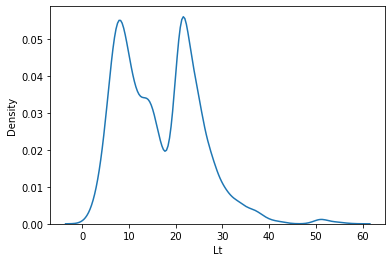

In [ ]:
seaborn.kdeplot(raw_data_smogn['Lt'], label = "Modified")

In [ ]:
BL_LT = raw_data_smogn.drop("Lt",axis=1)
BL_LT_labels = raw_data_smogn["Lt"].copy()
BL_LT_prepared = BL_LT.to_numpy()

In [ ]:
BL_LT_prepared.shape

(5893, 60)

In [ ]:
BL_LT_prepared_train, BL_LT_prepared_test, BL_LT_labels_train, BL_LT_labels_test = train_test_split(BL_LT_prepared, BL_LT_labels, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_et_tree_reg = AdaBoostRegressor(
    ExtraTreeRegressor(max_depth=200, random_state=42), n_estimators=60,
   learning_rate=0.5, random_state=42)
ada_et_tree_reg.fit(BL_LT_prepared_train,BL_LT_labels_train)

AdaBoostRegressor(base_estimator=ExtraTreeRegressor(ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=200,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=42,
                                                    splitter='random'),
                  learning_rate=0.5, loss='linear', n_estimators=60,
                  random_state=42)

In [ ]:
BL_LT_predicted = ada_et_tree_reg.predict(BL_LT_prepared_test)
ada_et_tree_mape = (np.abs((BL_LT_predicted - BL_LT_labels_test) / BL_LT_labels_test).mean(axis=0))
ada_et_tree_mape

0.10258820238577193